In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mine = cv2.imread('../image/mine.jpg', 0)
group = cv2.imread('../image/group.jpg', 0)
nadia = cv2.imread('../image/nadia.jpg', 0)
denis = cv2.imread('../image/denis.jpg', 0)
solvay = cv2.imread('../image/solvay.jpg', 0)

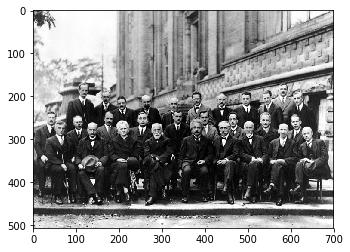

In [14]:
plt.imshow(solvay, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('../image/data/haarcascade_frontalface_default.xml')

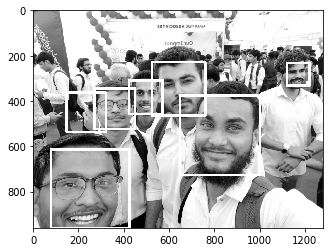

In [18]:
def detech_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 10)
    return face_img


result = detech_face(group)
plt.imshow(result, cmap='gray')

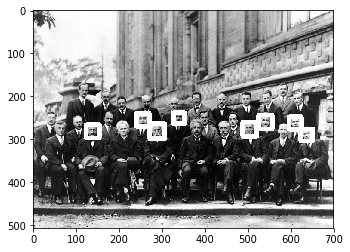

In [10]:
def detech_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 10)
    return face_img

result = detech_face(solvay)
plt.imshow(result, cmap='gray')

## Eye Detection

In [4]:
eye_cascade = cv2.CascadeClassifier('../image/data/haarcascade_eye.xml')

In [13]:
def detech_eyes(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.3, minNeighbors=5)
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 10)

    return face_img

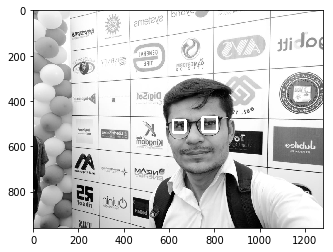

In [14]:
result = detech_eyes(mine)
plt.imshow(result, cmap='gray')

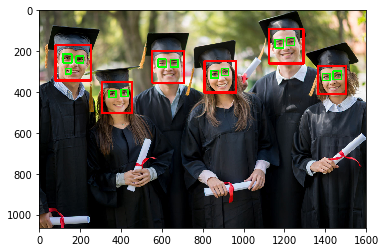

In [71]:
img = cv2.imread('../image/group1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

eye_cascade = cv2.CascadeClassifier('../image/data/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('../image/data/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),5)

plt.imshow(img)

In [13]:
eye_cascade = cv2.CascadeClassifier('../image/data/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier('../image/data/haarcascade_frontalface_default.xml')

def face_eye(img):
    
    img = cv2.resize(img, (640, 360))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
            
    return img

In [18]:
cap = cv2.VideoCapture('../image/test.mp4')
FPS = cap.get(cv2.CAP_PROP_FPS)

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer = cv2.VideoWriter('../image/test_face_eye.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (640, 360))

while True:
    ret, frame = cap.read()
    img2 = face_eye(frame)
    writer.write(img2)
    if ret:
    
        time.sleep(1/(FPS*4.5)) # FPS = 30 * 4 = 120 frame/sec
        
        cv2.imshow('Face Eye Detect', img2)
        
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release() 
writer.release()
cv2.destroyAllWindows()

In [16]:
cap = cv2.VideoCapture('../image/test_face_eye.mp4')
cap.get(cv2.CAP_PROP_FPS)

30.0